# Statistical Learning Basics A 機械学習基礎 A

## Introduction 前書き: Data Science in JD Course

Before we start this module, we check the role of this module in the the Joint Degree (JD) course .

このモジュールを始める前に、ジョイントディグリー(JD)専攻におけるこのモジュールの役割を確認する。

Read [Data science in JD course](../cells/Data_science_in_JD.ipynb).

[JD専攻におけるデータサイエンス](../cells/Data_science_in_JD.ipynb)を読め。

## Introduction 2 前書き2: Statistical Analysis vs. Machine Learning

Read [Statistical analysis vs. machine learning](../cells/Statistical_Analysis_vs_Machine_Learning.ipynb).

[統計解析 vs. 機械学習](../cells/Statistical_Analysis_vs_Machine_Learning.ipynb)を読め。

## Reference book 参考書

[English version](https://web.stanford.edu/~hastie/ElemStatLearn/)

[日本語版](http://www.kyoritsu-pub.co.jp/bookdetail/9784320123625)

## What is Learning 学習とは

Read [Learning](../cells/Learning.ipynb).

[学習](../cells/Learning.ipynb)を読め。


## Examples of Learning 学習の例

There are many learning methods. 
Before studying them specifically, we go over some examples to grab the concepts of learnig.

学習の手法はたくさんある。
手法を個別に勉強する前に、学習の概念を掴むために、いくつかの例を取り上げる。

Read [Examples_of_Learning](../cells/Examples_of_Learning.ipynb)

[学習の例](../cells/Examples_of_Learning.ipynb)を読め。

### Key Words

+ Parametric vs. Non-parametric
+ Supervised Learning vs. Un-supervised Learning

### Assignment 課題

+ Describe supervised and un-supervised learnings briefly.
+ There are four examples of learning in Chapter 1 of the refecence book. Describe their tasks. Pay attention to their joint distribution space.

## Classification 分類: Example of Supervised Learning 教師あり学習の例

Two prediction models.
### Linear Fitting and Least Square Method
### k-Nearest Neighbor Method

+ Linear fitting method : Tight restriction, parameteric, stable result
+ k-Nearest neighbor method : Loose restriction, non-parameteric, variable results depending on a parameter

Advanced study : Read [Parametric vs. Non-parametric](../cells/Parametric_vs_Nonparametric.ipynb)

### Task

+ n samples
+ 2 features
+ 2 categories
+ Classification

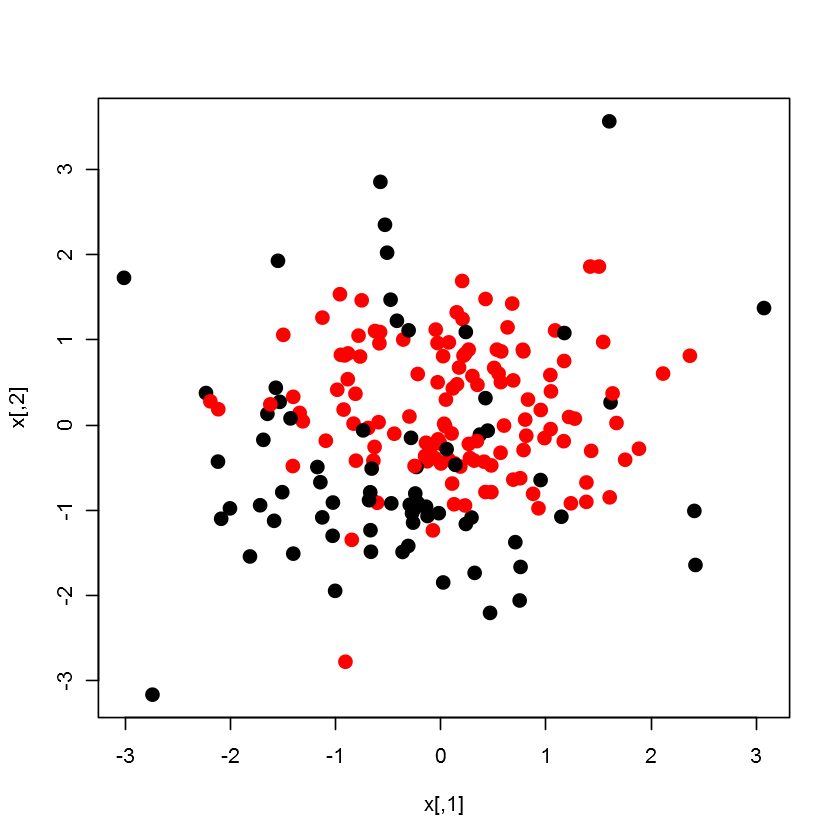

In [48]:
K <- 200
p <- 2
x <- matrix(rnorm(K*p),ncol=p)

ctr1 <- 1
ctr2 <- 0.5
r1 <- 0.2
r2 <- 0.5
v <- r1 * (x[,1]-ctr1)^2 + r2 * (x[,2]-ctr2)^2
t <- 1.2
v0 <- which(v< t)
v1 <- which(v>=t)

gr <- rep(0,K)
p0 <- 0.1
p1 <- 0.9
gr[v0] <- sample(0:1,length(v0),replace=TRUE,prob=c(p0,1-p0))
gr[v1] <- sample(0:1,length(v1),replace=TRUE,prob=c(p1,1-p1))

plot(x,col=gr+1,pch=20,cex=2)

### Linear Models and Least Squares

+ Straight line that divides points into two groups.
+ The group labels by the line should be close to the labels given.

The dots are shown in 2D space with two colors indicating groups.

The group information can be shown along the 3rd axis.

Linear regression identifies the flat plane so that the sum of squared distance between the 3D points and the corresponding points on the flat plane should be minimized.

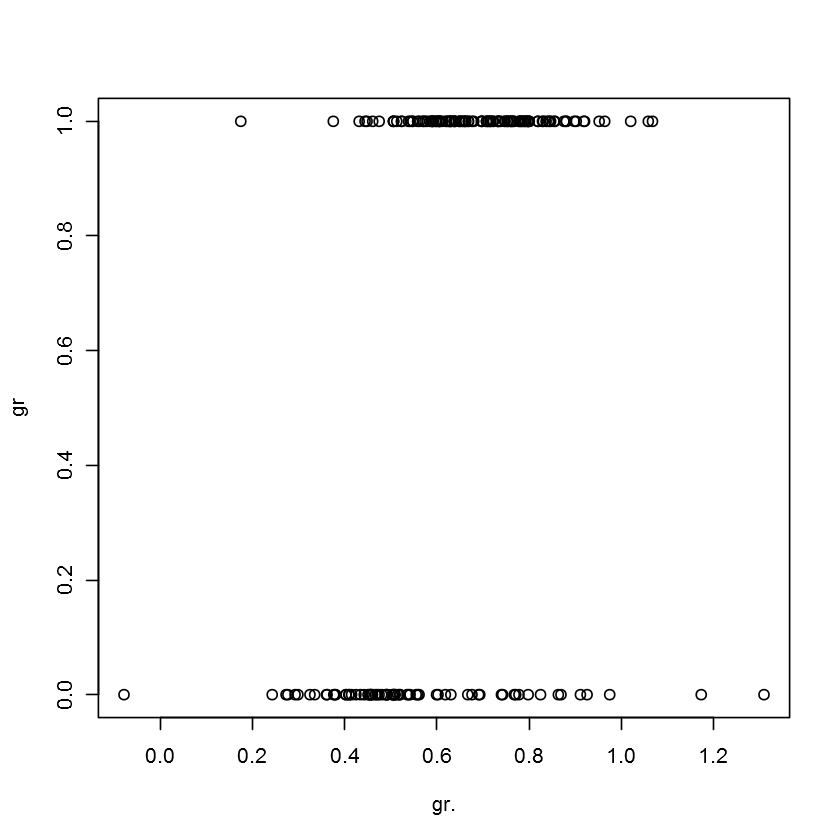

In [49]:
# library(rgl)
# plot3d(cbind(x,gr))
lm.out <- lm(gr~x)
gr. <- predict(lm.out)
plot(gr.,gr)
# plot3d(cbind(x,gr.))

Because two group values are 0 and 1, the samples can be re-grouped based on y. > 0.5, where y. stands for the predicted value.  

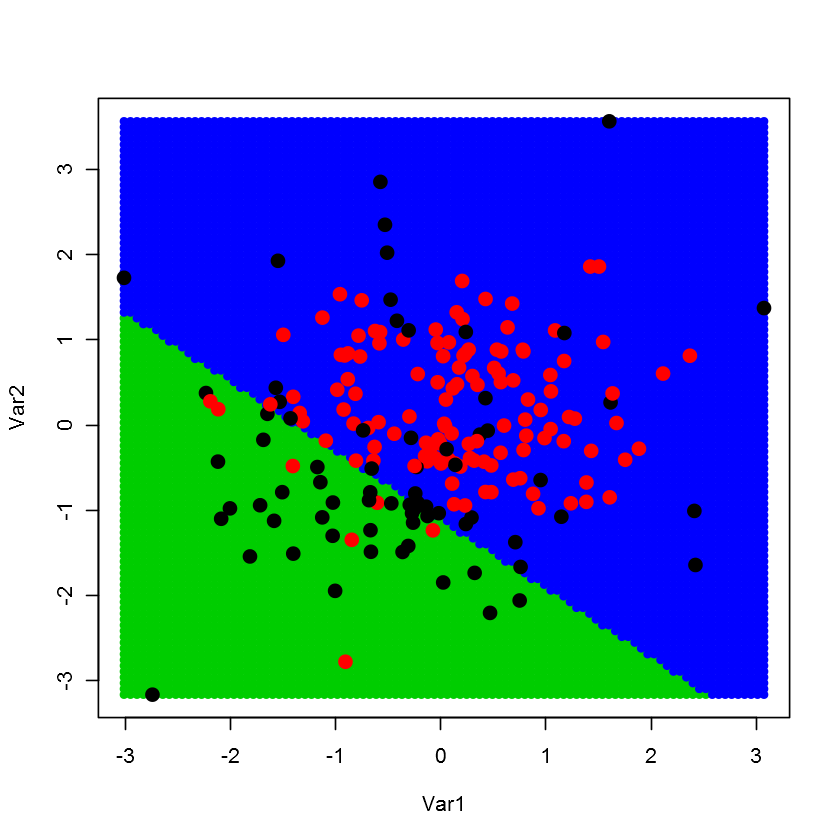

In [50]:

x1. <- seq(from=min(x[,1]),to=max(x[,1]),length=100)
x2. <- seq(from=min(x[,2]),to=max(x[,2]),length=100)
x. <- as.data.frame(expand.grid(x1.,x2.))
y. <- lm.out$coefficients[1] + lm.out$coefficients[2]*x.[,1] + lm.out$coefficients[3]*x.[,2]
col <- (y.>0.5)+3

plot(x.,col=col,pch=20)
points(x,col=gr+1,pch=20,cex=2)

#### Linear regression and minimization

Extract the formulas to minimize the sum of squared distance. 

The transformation of formulas are based on matrix calculation and differentiation. 

See [Linear Regression](../cells/Linear_Regression.ipynb) for them.

#### Assignment

+ Describe least square-based classification method.

### Nearest Neighbors 最近傍

#### Definition 定義

$$
\hat{Y}(x) = \frac{1}{k} \sum_{x_i \in N_k(x) } y_i  ,
$$
where $N_k(x)$ is the neighborhood of x defined by the k closest points $x_i$. 

#### k=1

When k=1, the space is classified as a Voronoi diagram.

[Voronoi diagram](https://en.wikipedia.org/wiki/Voronoi_diagram)

[ボロノイ図](https://en.wikipedia.org/wiki/Voronoi_diagram)

##### Reference 参考

The Voronoi diagram of a set of points is dual to its [Delaunay triangulation](https://en.wikipedia.org/wiki/Delaunay_triangulation).

点の集合のボロノイ図は[ドロネー三角化](https://en.wikipedia.org/wiki/Delaunay_triangulation)の双対に相当する。

#### k > 1

When k > 1, $\hat{Y}(x)$ is an average of $Y(x)$ values of points nearby, that means the effect of each point nearby is "averaged" or "smoothed".

Therefore, $k$ is a smoothing parameter.

#### Example : kNN (k=5)

We apply kNN (k=5) method to the data set and check how many samples were labeled wrong (error rate of training samples).


#### Assignment 課題

+ Describe kNN-based classification method.

## Evaluations of Classification 分類の評価

### Training Set and Test Set

+ Training samples are the samples that are used as inputs of a learning method. The samples have label values that are the ANSWER of classification.

+ Test samples are the samples that are not used as inputs of a learning method. The samples have label values that are the ANSWER of classification.

### Two things to be evaluated

+ How good is the learned classification rule?

+ How good is the method that returns classification rule?

### Evaluation of learned classification rules

Read [Error Rates of Training and Test Sets](../cells/Error_Rates_of_Training_and_Test_Sets.ipynb).

+ Error rate of training set
+ Error rate of test set


### Evaluation of methods that return classification rules

Read [Evaluation of Learning Methods](../cells/Evaluation_of_Learning_Methods.ipynb).



##### Assignment 課題

+ When a distribution of population is known and it is possible to generate sample sets, how do you evaluate/compare performance of the least square method and k-NN method with various k values?

+ When a distribution of population is UNKNOWN but it is possible to generate sample sets, how do you evaluate/compare performance of them?

+ When a distribution of population is UNKNOWN and it is NOT possible to generate sample sets, how do you evaluate/compare performance of them?



### Example : Various k values

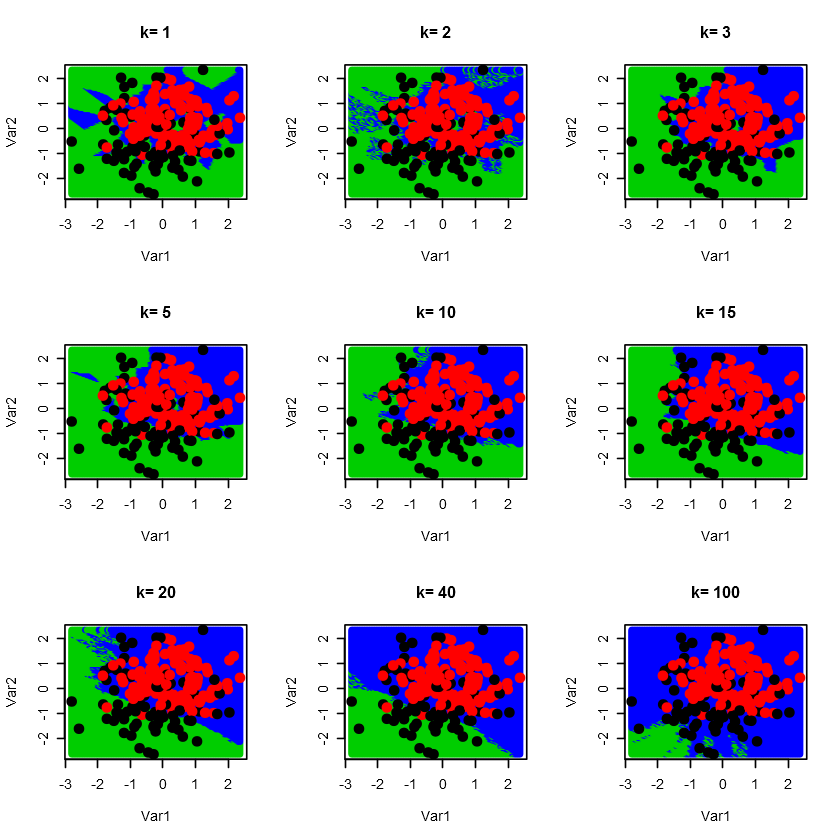

In [44]:
library(class)
ks <- c(1,2,3,5,10,15,20,40,100)
par(mfrow=c(3,3))
for(i in 1:9){
    knn.out <- knn(x,x., gr, k = ks[i], prob=TRUE)
    #str(knn.out)

    plot(x.,col=as.numeric(knn.out)+2,pch=20,main = paste("k=",ks[i]))
    points(x,col=gr+1,pch=20,cex=2)
}
par(mfcol=c(1,1))


###### Assignment 課題

+ Using the data set generation codes above, generate multiple (e.g., 1000) pairs of training and test sets. For each set, apply least square and kNN methods with k= {1,2,3,5,10,15,20,40,100} and calculate error rates of training and test sets. Visualize the results.

## How to balance bias and variance?

Degree of freedom, number of parameters, balance between bias and variance



## 回帰のための線形手法

データを全部使う。
全てがTraining。

Overfittingするから、控えめにしようよ。

kNNでは、kを増やすことでSmoothingして控えめにできた。Least Squaresはそれが出来ないので、何か変わりを。

### Full Model

### Weaken the Full Model 控えめにしようよ

Overfitting <-> 控えめにしようよ = 残差が大きくなるけど、それを採用するということ

#### Variable Subset Selection

探索空間の探し方とその不完全性。
採用の順番によって、採用される変数セットが変わる。それは不本意。

#### Shrinkage Methods

やりたいこととできること。

やりたいことでも出来なければ方法にはならない。

Ridge

Lasso

#### Directions Rather than Variables

PCAで上からいくつかを取る。

## 分類のための線形手法

飛ばすかも

## 基底展開と正則化

基底という考え方。


## カーネル平滑化法

スムージング。
密度分布推定。